# Bayesian Classification By Phoneme Frequency
Camille Girard

Jonah Spicher

## Abstract

For this project we would like to recognize the language of a word based on the phonemes in the word. Given a word, input in its phoneme form, and a predefined dataset of phoneme frequency in each language being tested, we will run through all the phonemes in the word and calculate the probability of each language. Combining all the phonemes of the word will return an updated probability that the observed word is in that language. 

Question: Let's say you are in a place where people are speaking five languages: English, Spanish, Mandarin, and Arabic. You overhear someone say a word, based on the sounds in that word, which language are they speaking? 
Given each of these five words, (language, idioma,  语言, لغة)

## Introduction
Usualy, it is fairly easy to tell what language someone is speaking just by hearing it, at least assuming you have heard that language spoken before. The information is being conveyed (obviously) by the sounds they are making, so it should be possible to guess the language of a word given the sounds that make that word up. Bayesian classification provides a fairly straightforward solution: figure out how often those phonemes appear in a given language, and the probability that you heard that language followes from Bayes theorem. 

## Code

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite
import thinkplot

We start with an even prior. This is obviously not a reasonable decision in real life. At the most basic level, you would want to factor in the percentage of people in the world who speak each language, but in reality your prior will skew heavily towards the domnant languages in your area. For this toy example in a mysterious room with only these four (somewhat random) languages, it seems like a reasonable choice, and will at least show how strong of evidence each word offers. Really, this project isn't about the actual likelihood of each language, but rather whether a word was evidence for or against each language.

We chose to work with English, Spanish, Arabic, and Mandarin, partially due to phonetic differences, and partially due to the availability of data.

In [3]:
languages = ['English', 'Spanish','Arabic', 'Mandarin']
lang_prior = Pmf(languages)
lang_prior.Print()

Arabic 0.25
English 0.25
Mandarin 0.25
Spanish 0.25


### Classification code

Next, we need to define our suite and its parameters. For now, a naive Bayesian model seems fine, but given time we will revisit this decision, as this ignores dipthongs, which often are defining features in a language. Here, though, our data is just a series of phonemes, and our hypothesis is a language. The likelihood, then, is just how often the given phoneme appears in our hypothetical language. We have stored these values in a .csv file, so likelihood is just a simple lookup.

In [16]:
import pandas as pd
loc = "/home/jonah/Bayesian-Phoneme-Frequencies/code/" # Jonah's laptop
# loc = "/home/cgirard/Bayesian-Phoneme-Frequencies/code/" # Camille's laptop
document = loc + "Phonemes - Sheet1.csv"
df = pd.read_csv(document)
df.head()

,Phonemes,English,Spanish,Mandarin,Arabic
0,ə,0.1149,0.000,0.000000,0.000000
1,n,0.0711,0.071,0.082144,0.057047
2,r,0.0694,0.054,0.005955,0.080537
3,t,0.0691,0.045,0.016942,0.020134
4,ɪ,0.0632,0.000,0.000000,0.000000


To account for imperfections in the data, if a phoneme does not appear (has a frequency of 0%) we chose to add a small amount so that each language wasn't ruled out immediately. Other than that, the likelihood is the product of the frequency of each phoneme in the word. 

In [93]:
class Language(Suite):
    
    def Likelihood(self, data, hypo):
        """
        data: list of phonemes 
        hypo: name of languages
        """
        language = hypo
        like = 1
        for i in data:
            #lookup the row number of that phoneme
            row = df.loc[df['Phonemes']==i].index
            if row.size < 1:
                like *= 0.0001
            else:
                value = df[language][row[0]]
                if value <= 0:
                    like *= 0.0001
                else:
                    like *= value
        return like

## Results
Now, we just have to feed the Suite each word (in IPA) and it should get a decent idea of which language each word belongs to. 

Arabic 6.858617168766549e-11
English 0.9999999789382166
Mandarin 1.6525644642665136e-13
Spanish 2.0993032045202706e-08


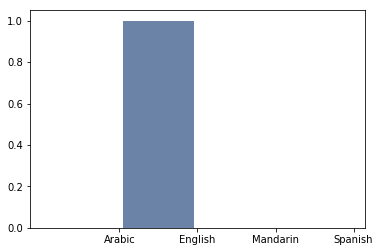

In [94]:
lang_dist = Language(lang_prior)
word = ["l","e","ɪ",'ŋ','g','w','i','j'] # English
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 3.864246588129542e-05
English 0.497273749749969
Mandarin 0.00047046279358101454
Spanish 0.5022171449905688


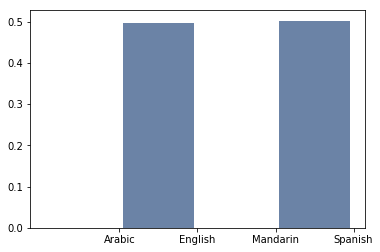

In [95]:
lang_dist = Language(lang_prior)
word = ['i','ð','j','o','m','a'] # Spanish
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 0.0005726087652544619
English 0.9975745222015489
Mandarin 6.9909662049617876e-06
Spanish 0.0018458780669917485


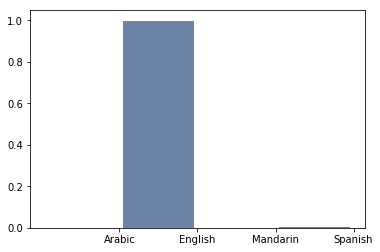

In [96]:
lang_dist = Language(lang_prior)
word = ["j","u","j","e","n"] # Mandarin maybe??
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 0.02805207111088329
English 0.9413970108517121
Mandarin 7.872274914228565e-09
Spanish 0.03055091016512959


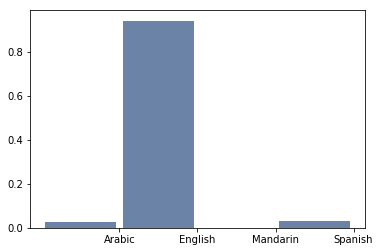

In [97]:
lang_dist = Language(lang_prior)
word = "word" #Arabic will go here, once I figure that out
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 0.0024932284460118534
English 0.9975067148211161
Mandarin 1.563777362139487e-11
Spanish 5.671723430601329e-08


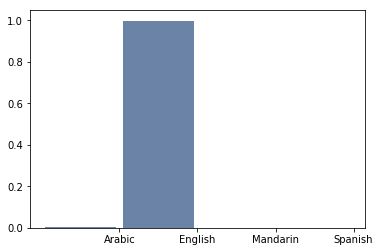

In [98]:
# testing with the word thursday in english - seems to work rather well - maybe do words more unique to language
lang_dist = Language(lang_prior)
word = ['θ','ə','r','z','d','ā']
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

So it looks like [it worked or it didnt], because feeding each word gave a [high or low] probability that the word belonged to the correct language. - Right now seems to get the right one in the top 2 so works fairly well but not great. With more unique sounds and words to a language it seems to get it, confused pretty easily by the other ones.